### Mobile Price Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
df_test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [16]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

### Описание данных

battery_power - Общая энергия, которую батарея может хранить за один раз, измеряется в мАч

blue - Наличие Bluetooth или нет

clock_speed - Скорость, с которой микропроцессор выполняет инструкции

dual_sim - Наличие поддержки двух SIM-карт или нет

fc - Мегапиксели фронтальной камеры

four_g - Наличие 4G или нет

int_memory - Внутренняя память в гигабайтах

m_dep - Глубина мобильного телефона в см

mobile_wt - Вес мобильного телефона

### Разведочный анализ данных

In [21]:
df_train.shape

(2000, 21)

In [23]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [27]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Визуальный анализ

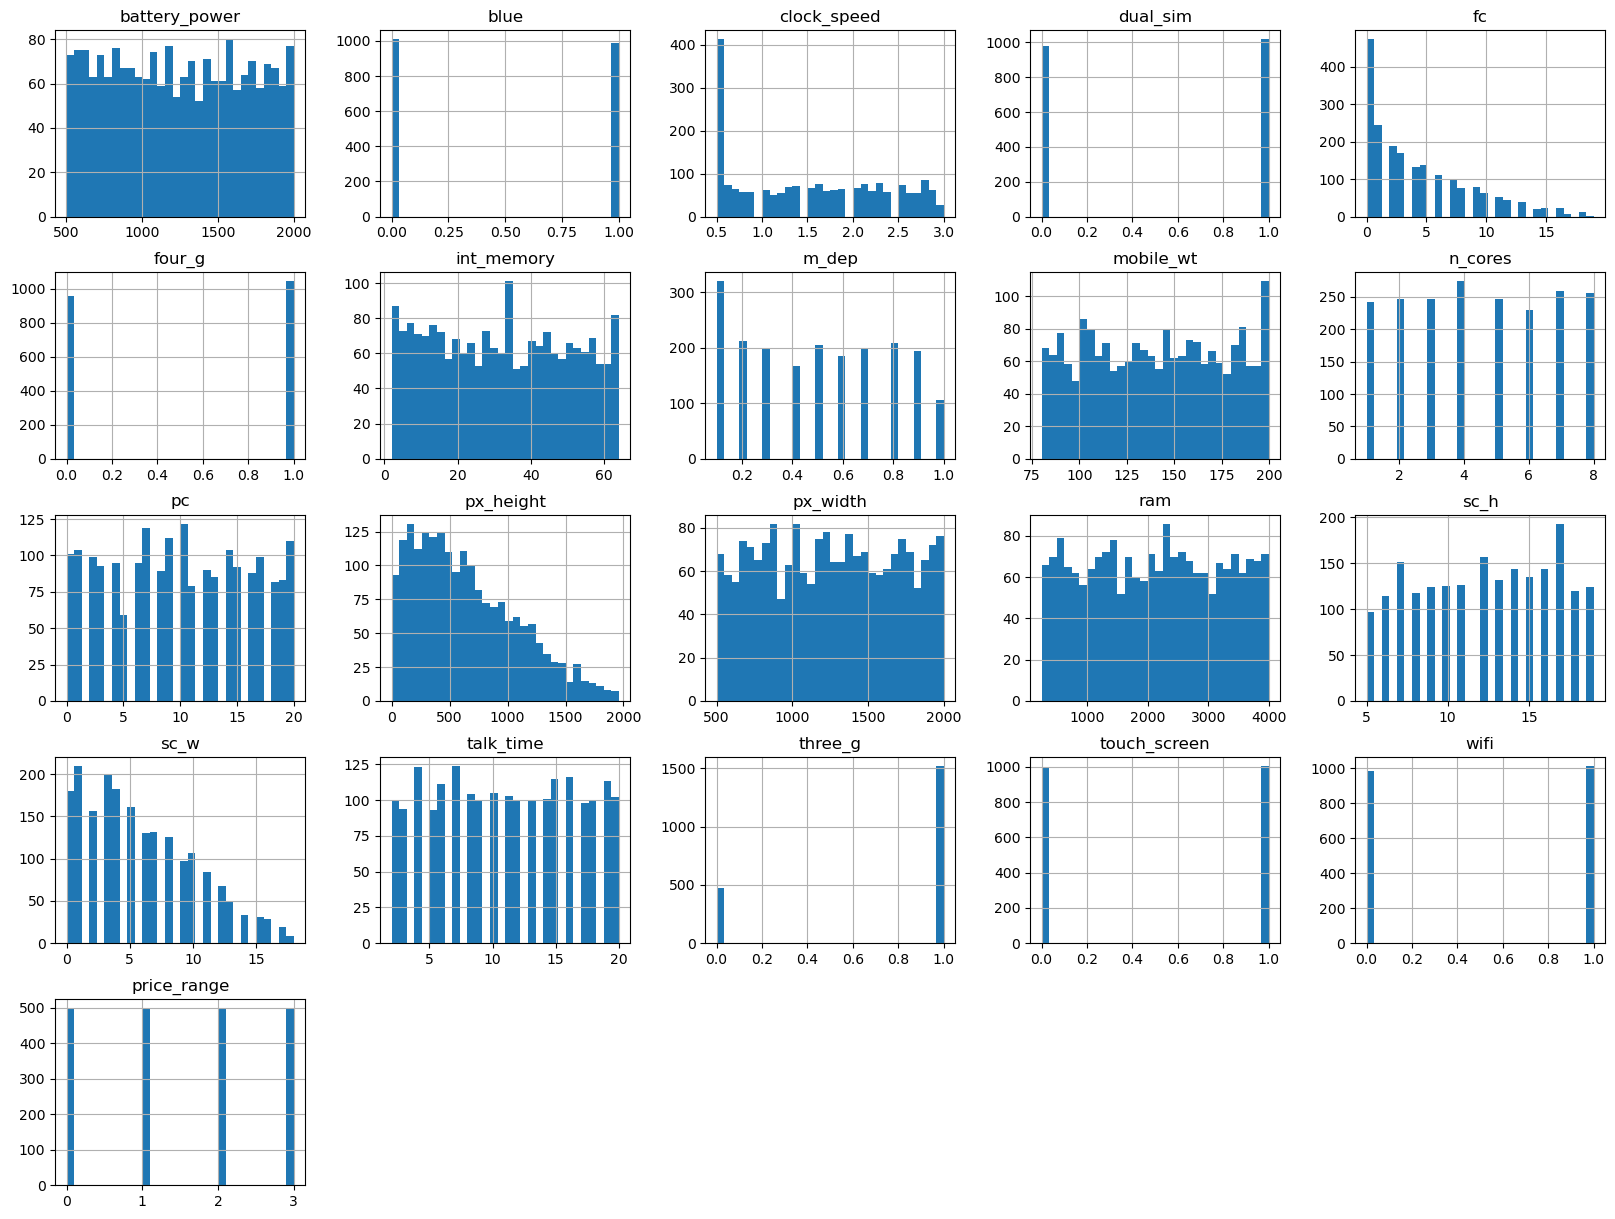

In [30]:
df_train.hist(bins=30, figsize=(20, 15))
plt.show()

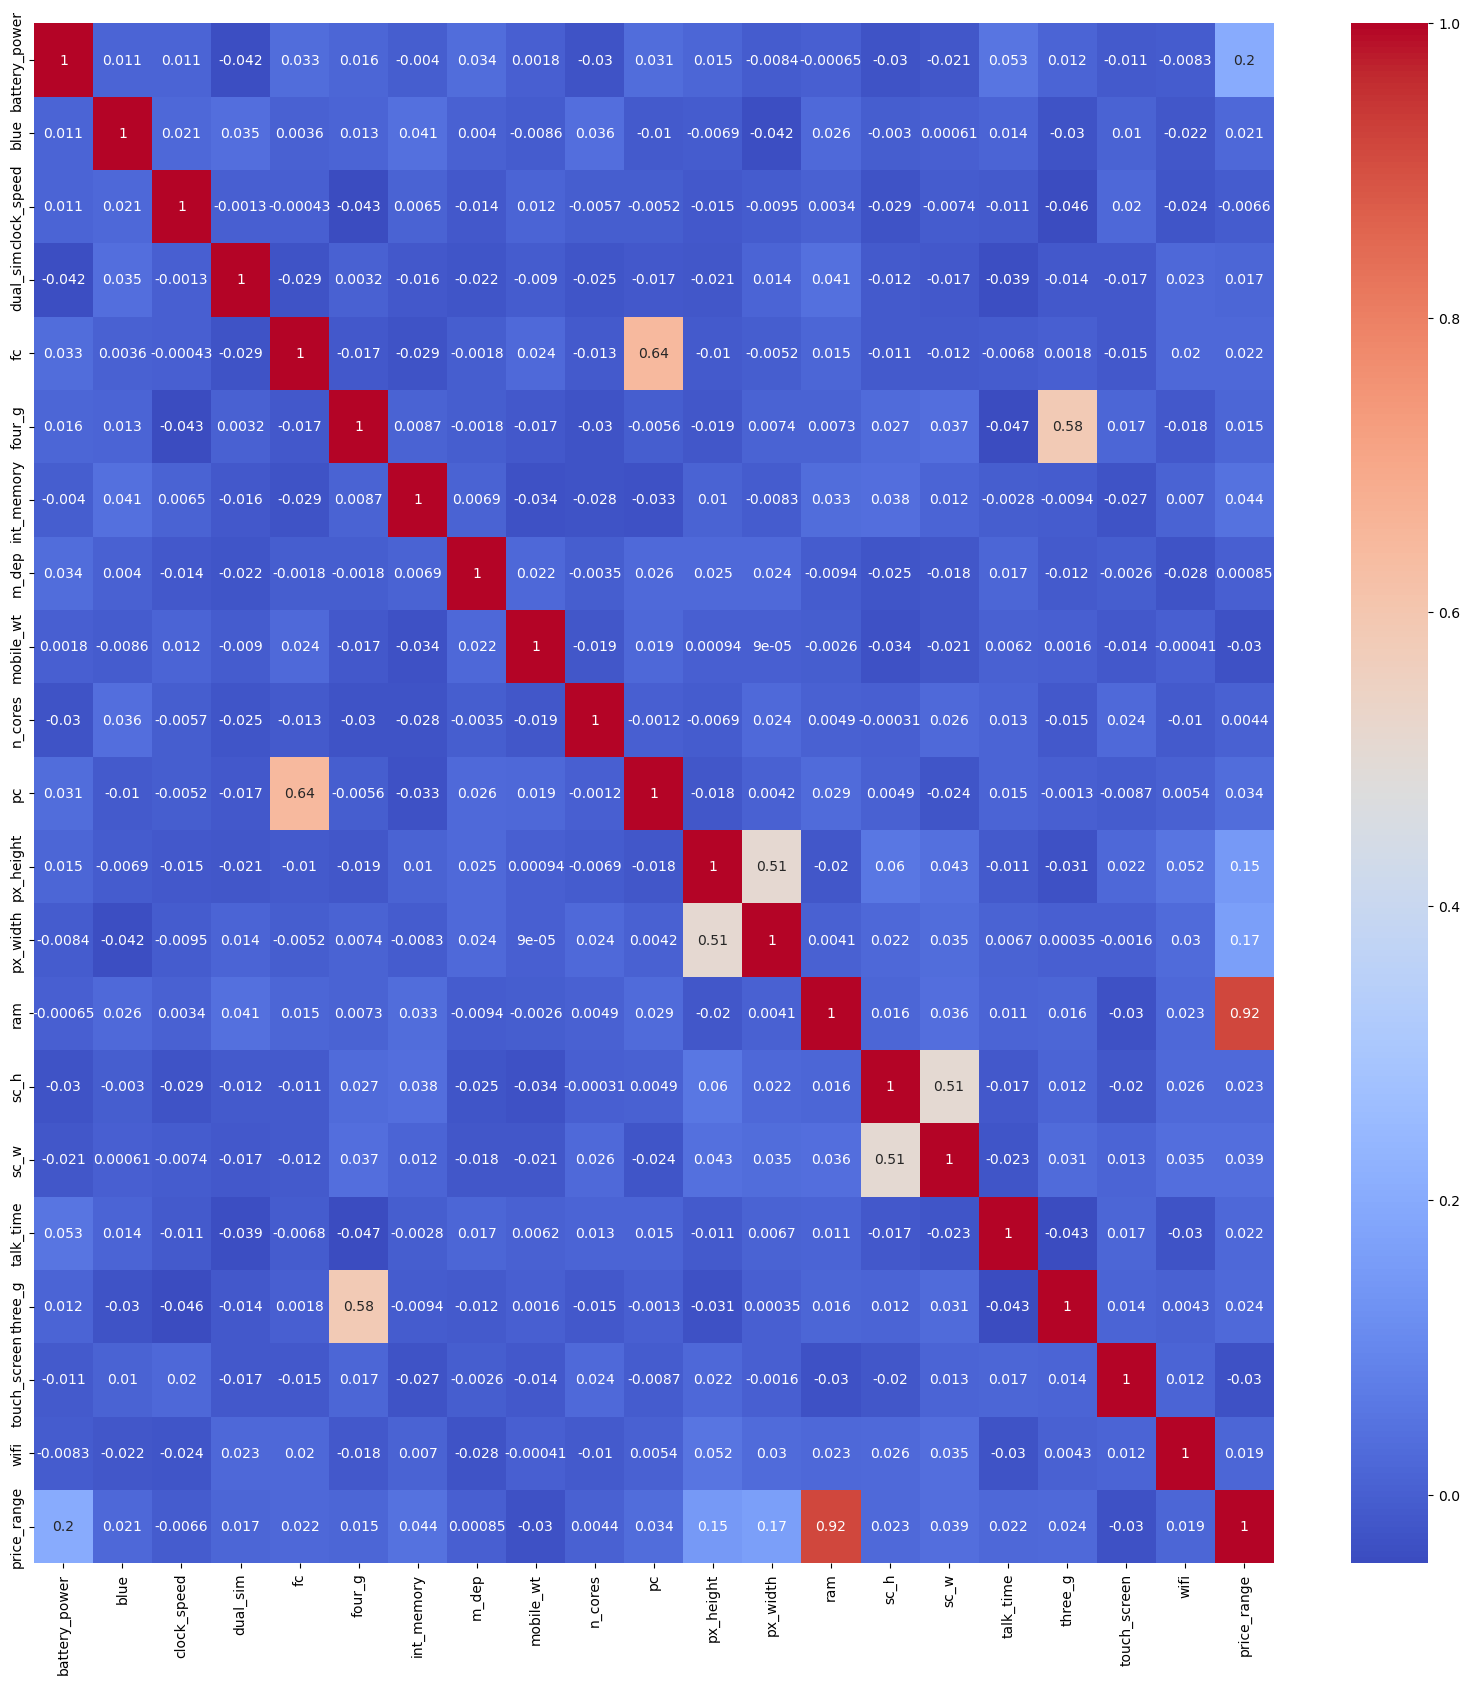

In [31]:
corr_matrix = df_train.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

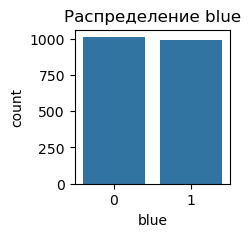

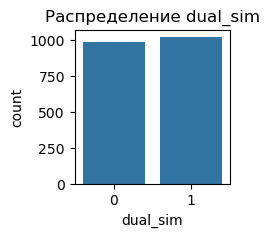

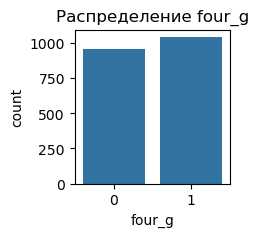

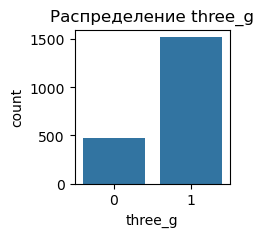

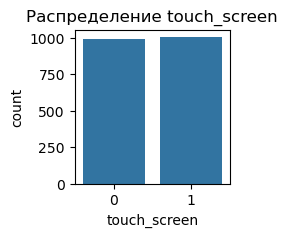

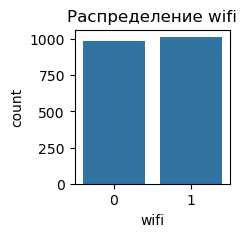

In [32]:
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for feature in categorical_features:
    plt.figure(figsize=(2, 2))
    sns.countplot(x=feature, data=df_train)
    plt.title(f'Распределение {feature}')
    plt.show()

<Axes: xlabel='price_range', ylabel='ram'>

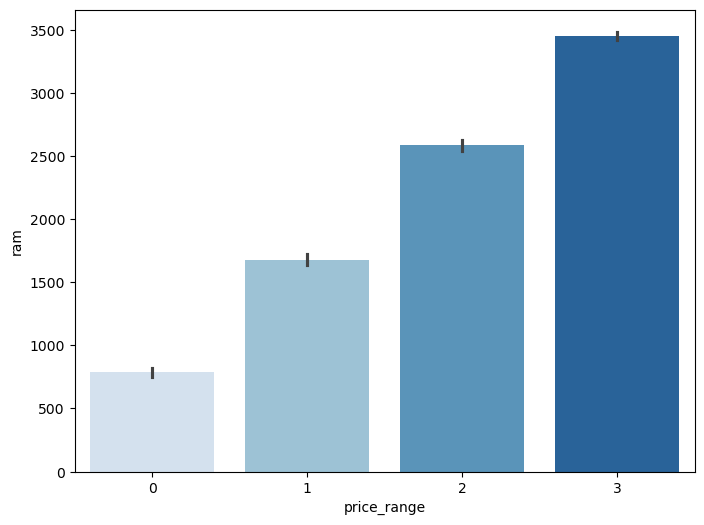

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_train,x="price_range",y="ram",palette="Blues")

<Axes: xlabel='four_g', ylabel='count'>

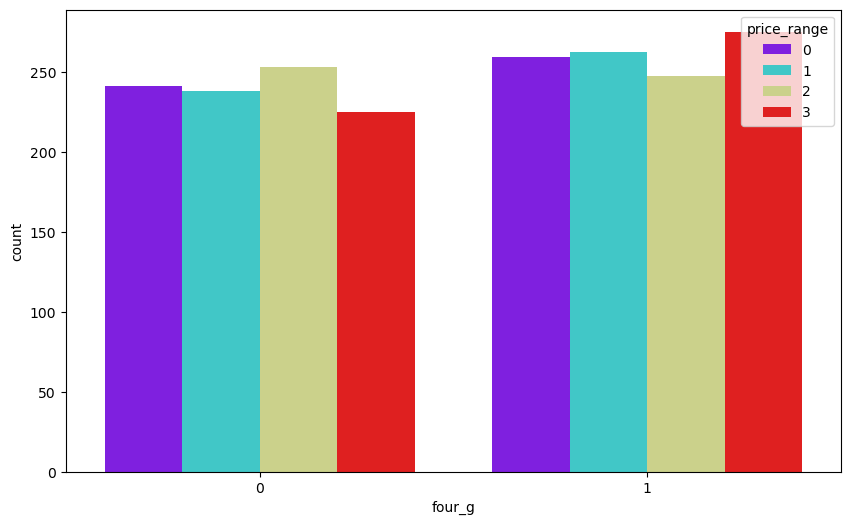

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train,x="four_g",hue="price_range",palette="rainbow")

<Axes: xlabel='three_g', ylabel='count'>

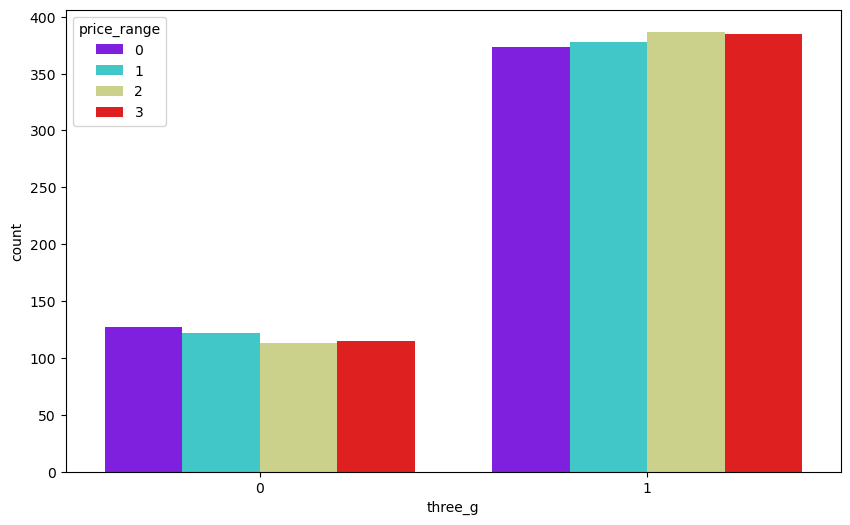

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train,x="three_g",hue="price_range",palette="rainbow")

<Axes: xlabel='price_range', ylabel='px_width'>

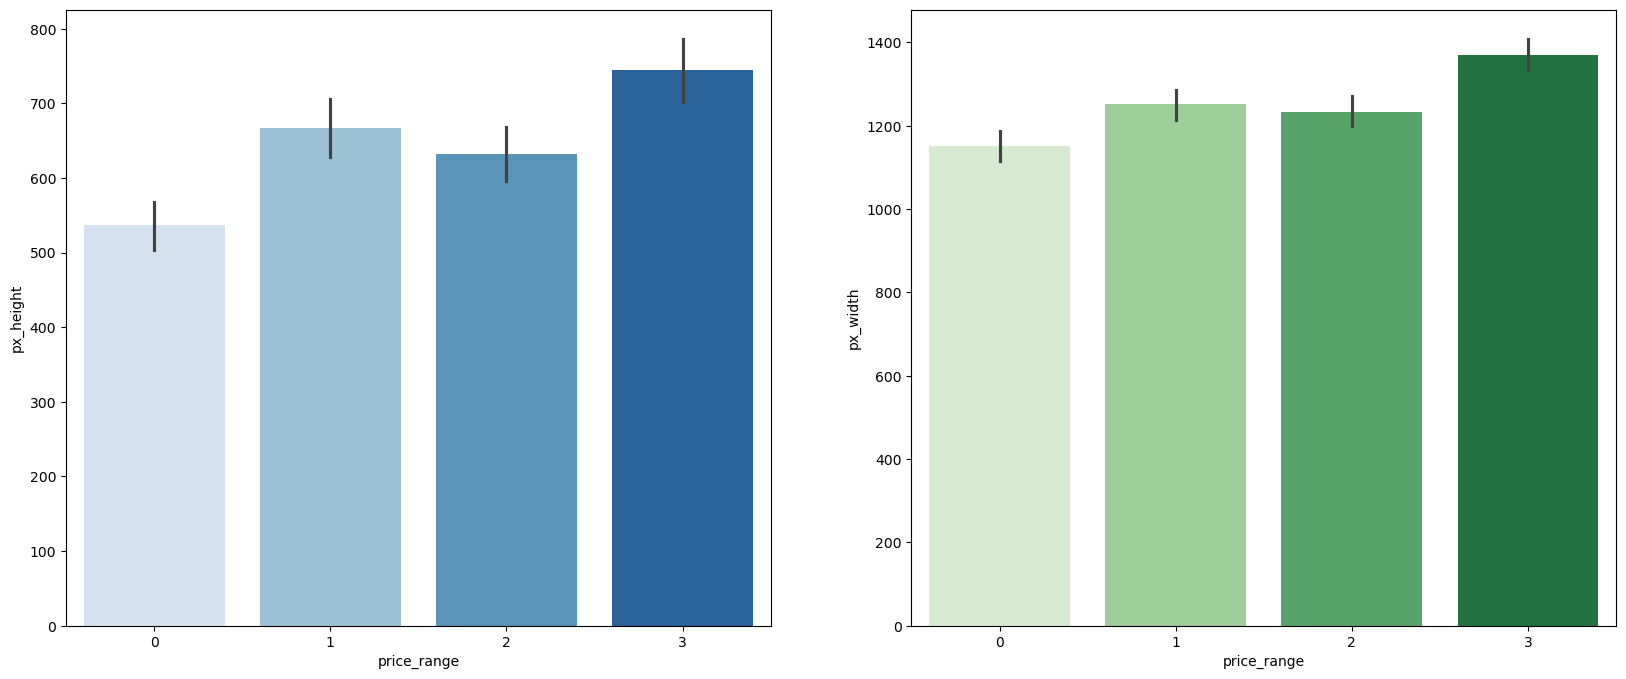

In [36]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.barplot(data=df_train,x="price_range",y="px_height",palette="Blues")
plt.subplot(122)
sns.barplot(data=df_train,x="price_range",y="px_width",palette="Greens")

### Modelling

In [136]:
from sklearn.model_selection import train_test_split

In [138]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df_train[['ram','blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi','fc', 'pc','int_memory','n_cores', 'px_height', 'px_width']], 
                                                      df_train['price_range'], 
                                                      test_size=0.33, 
                                                      random_state=42)

In [142]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1340, 13) (660, 13) (1340,) (660,)


In [144]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_pred = knn.predict(X_test)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       169
           1       0.70      0.74      0.72       162
           2       0.70      0.67      0.69       162
           3       0.84      0.84      0.84       167

    accuracy                           0.78       660
   macro avg       0.78      0.78      0.78       660
weighted avg       0.78      0.78      0.78       660



In [66]:
from sklearn.metrics import confusion_matrix

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)

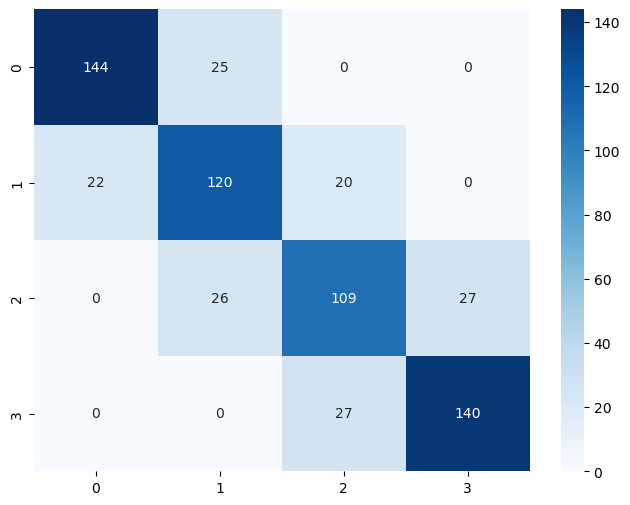

In [70]:
Y = df_train['price_range']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.show()

### Gaussian Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [86]:
gnb.fit(X_train, y_train)

GaussianNB()

In [88]:
y_pred_gnb = gnb.predict(X_test)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       169
           1       0.70      0.70      0.70       162
           2       0.68      0.69      0.68       162
           3       0.86      0.86      0.86       167

    accuracy                           0.78       660
   macro avg       0.78      0.78      0.78       660
weighted avg       0.78      0.78      0.78       660



In [91]:
from sklearn.metrics import confusion_matrix

In [94]:
conf_matrix = confusion_matrix(y_test, y_pred_gnb)

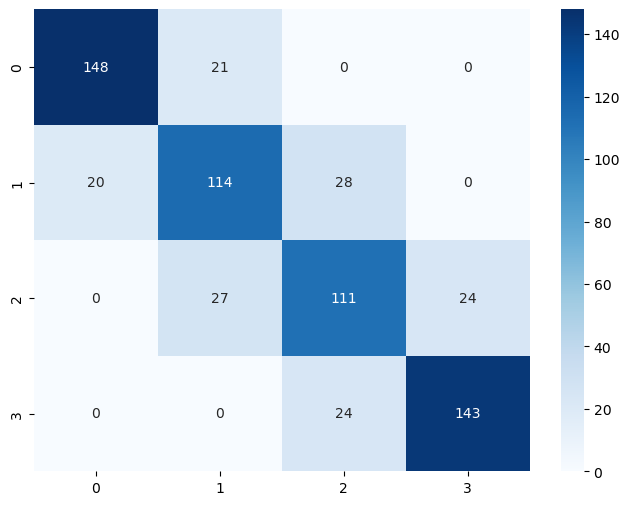

In [96]:
Y = df_train['price_range']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

### Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

In [114]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [115]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 2, 0, 3, 1, 2, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0],
      dtype=int64)

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0],
      dtype=int64)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       169
           1       0.75      0.75      0.75       162
           2       0.73      0.68      0.71       162
           3       0.84      0.88      0.86       167

    accuracy                           0.80       660
   macro avg       0.80      0.80      0.80       660
weighted avg       0.80      0.80      0.80       660



In [120]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy

0.8045454545454546

In [122]:
from sklearn.metrics import confusion_matrix

In [124]:
conf_matrix = confusion_matrix(y_test, rfc_pred_test)

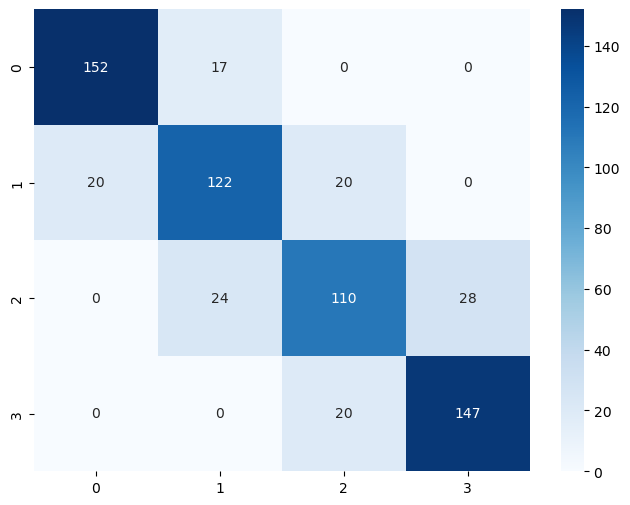

In [126]:
Y = df_train['price_range']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

### Logistic Regression (Логистическая регрессия)

In [148]:
from sklearn.linear_model import LogisticRegression

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [154]:
y_pred_lr = lr.predict(X_test)

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       169
           1       0.74      0.77      0.75       162
           2       0.74      0.72      0.73       162
           3       0.86      0.87      0.87       167

    accuracy                           0.81       660
   macro avg       0.81      0.81      0.81       660
weighted avg       0.81      0.81      0.81       660



In [158]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

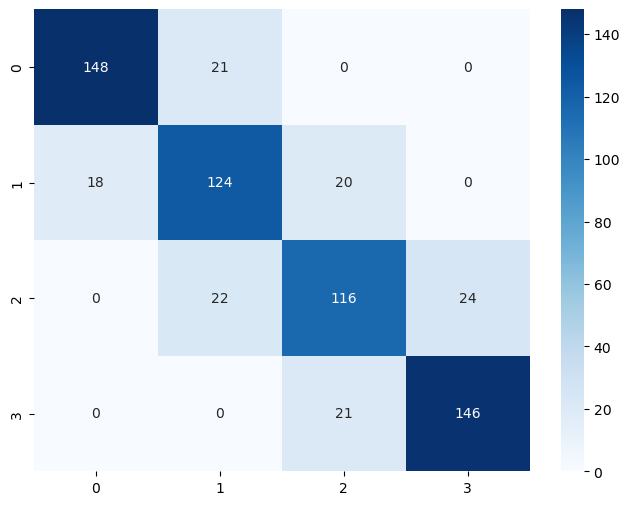

In [160]:
Y = df_train['price_range']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

### Сравнение моделей

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log = pd.DataFrame()

log["Classifier"] = classifiers
log["Accuracy"] = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, rfc_pred_test), accuracy_score(y_test, y_pred_lr)]

log

,Classifier,Accuracy
0,KNeighborsClassifier,0.804545
1,Gaussian Naive Bayes,0.781818
2,Random Forest Classifier,0.804545
3,Logistic Regression,0.809091


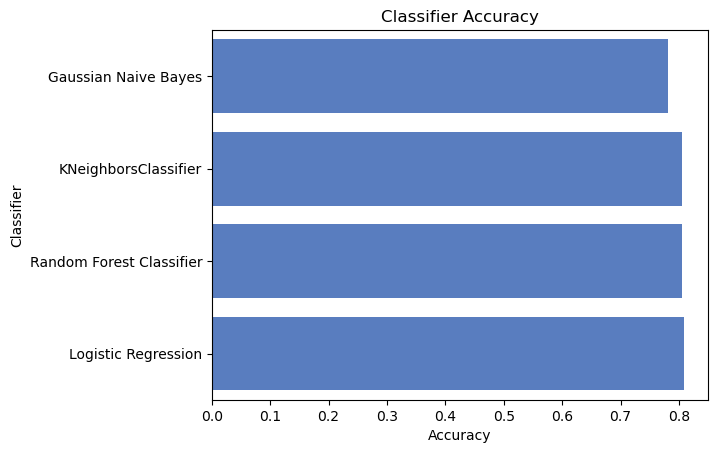

In [164]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

### Вывод

In [ ]:
Был загружен датасет Mobile Price Classification. Мы провели разведочный анализ данных и выявили, что в нём нет пустых и аномальных значений. Датасет имеет 2000 записей и 21 атрибут. Мы посмотрели тепловую карту и заметили корелляцию между ram и price_range. А также между sc_hight и sc_width и pc и fc. После чего мы посмотрели зависимости и перешли к обучению моделей. По итогам лучше всех показала себя логистическая регрессия, а хуже всех - 